In [2]:
%matplotlib inline
from sympy import * 
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np
import os, json, random, matplotlib
from scipy import optimize, special

from scipy.optimize import curve_fit
from scipy import optimize, special
from numpy import pi, sqrt, ceil, array, sin, cos, tan, arctan, tanh, log, exp
from qutip import (Qobj, tensor, basis, fock, ket, num, qeye, destroy, fidelity, expect, 
                   ket2dm, mesolve, identity, sigmax, sigmay, sigmaz, bra)
from qutip.visualization import plot_fock_distribution, matrix_histogram
                  
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
np.set_printoptions(suppress=True)
from qutip.visualization import hinton
num = 2*np.pi

# detuning and W/Omega sweep

In [2]:
## Sweep frequency detuning (Lx) W=5, Omega=1.0, Kappa=0.5, Tp=20us
ln75 = [13.5620438, 14.18197431, 31.80376432, 55.79793359, 70.40387402, 80.3386275, 85.91548736, 87.41083351, 85.40711807, 80.83130352, 74.89874132, 68.03598178, 61.39076724, 55.18250037, 49.58884572, 44.49825286]
ln65 = [13.85722963, 13.64732157, 14.14442833, 32.49302176, 60.54912445, 78.79081728, 90.86655727, 96.71199215, 96.87140587, 92.66950559, 85.78179272, 77.86702563, 69.6061539, 62.02068873, 55.24949696, 49.35507696]
ln55 = [29.45391621, 13.87941511, 13.72837264, 14.11197606, 33.10184484, 65.27212114, 87.47191776, 101.66303676, 107.21863156, 105.32298017, 98.45144154, 89.16355107, 79.45795344, 70.09666555, 61.87144425, 54.78735326]
ln45 = [52.78896189, 30.48256983, 13.90111286, 13.8028345, 14.08417517, 33.59566735, 69.59997666, 95.60927444, 111.42193981, 115.88683675, 111.36062626, 101.76080454, 90.41726245, 79.42114636, 69.42509896, 60.93525443 ]
ln35 = [69.65461765, 58.28781983, 31.44157668, 13.92237836, 13.86781107, 14.06025327, 33.94742245, 73.09185463, 102.0415695, 118.39154757, 120.93265994, 113.68705399, 101.90519054, 89.28500405, 77.72086758, 67.63931067]
ln25 = [80.41378045, 78.12633613, 63.57142726, 32.29600986, 13.94312036, 13.92023343, 14.03921263, 34.13442235, 75.30794144, 105.56834967, 120.95083056, 121.07262567, 111.70368116, 98.80588874, 85.92163531, 74.55785]
ln15 = [86.06706823, 90.94268564, 86.85246953, 68.33493289, 33.01505055, 13.96321469, 13.9572819, 14.01991741, 34.13907155, 75.93431879, 105.42346151, 118.42241091, 116.23890807, 105.84585373, 93.04932927, 80.8429795]
ln05 = [87.69557473, 97.03598445, 101.73324127, 95.06154669, 72.22522765, 33.57348994, 13.98257451, 13.97644784, 14.00130394, 33.95177552, 74.86246773, 101.6484093, 111.47727564, 107.62942841, 97.35677804, 85.62570575]
l05 = [85.62570791, 97.35678064, 107.62943223, 111.47727248, 101.64841277, 74.86247204, 33.95178477, 14.00130772, 13.97644807, 13.98257107, 33.57348113, 72.22522187, 95.06154158, 101.7332389, 97.03598156, 87.69556917]
l15 = [80.84298101, 93.04932961, 105.84585175, 116.23890962, 118.42240736, 105.4234628, 75.93432097, 34.13907924, 14.01992157, 13.95728224, 13.96321162, 33.01504234, 68.33492619, 86.85246358, 90.94268006, 86.06706159]
l25 = [74.55785002, 85.92163356, 98.80588476, 111.70367901, 121.07263068, 120.95082613, 105.56835211, 75.30794582, 34.13443104, 14.03921642, 13.92023376, 13.94311712, 32.2960008, 63.57141617, 78.12632967, 80.41377567]
l35 = [67.63930902, 77.72086349, 89.2849996, 101.90518593, 113.68704903, 120.932658, 118.39154612, 102.04156915, 73.09185513, 33.94743062, 14.06025775, 13.86781171, 13.92237499, 31.44156804, 58.28780841, 69.654611 ]
l45 = [60.93525013, 69.42509419, 79.42114203, 90.41726241, 101.76079735, 111.36062146, 115.88683793, 111.42193074, 95.60926868, 69.59997677, 33.59567442, 14.08417966, 13.80283554, 13.9011101, 30.48256183, 52.78894958]
l55 = [54.78734873, 61.87143869, 70.09666053, 79.45795148, 89.16354534, 98.45143676, 105.32296849, 107.21862595, 101.66302531, 87.47191444, 65.27212185, 33.10185311, 14.1119803, 13.72837374, 13.87941246, 29.45390779]
l65 = [49.35507289, 55.24949045, 62.02068456, 69.6061487, 77.86701833, 85.78178275, 92.66949528, 96.87139679, 96.71198957, 90.8665523, 78.79081142, 60.54912369, 32.49302932, 14.14443327, 13.64732253, 13.85722727]
l75 = [44.49824701, 49.58883881, 55.18249415, 61.39076237, 68.03597666, 74.89873497, 80.83129492, 85.40710974, 87.41082356, 85.915477, 80.33862127, 70.40386683, 55.79793261, 31.80377156, 14.18197955, 13.56204484   ]
logic_T_2d = []
logic_T_2d.append(ln75)
logic_T_2d.append(ln65)
logic_T_2d.append(ln55)
logic_T_2d.append(ln45)
logic_T_2d.append(ln35)
logic_T_2d.append(ln25)
logic_T_2d.append(ln15)
logic_T_2d.append(ln05)
logic_T_2d.append(l05)
logic_T_2d.append(l15)
logic_T_2d.append(l25)
logic_T_2d.append(l35)
logic_T_2d.append(l45)
logic_T_2d.append(l55)
logic_T_2d.append(l65)
logic_T_2d.append(l75)
logic_T_2d = np.array(logic_T_2d)
det_list1 = np.linspace(-7.5,7.5,16)
det_list2 = np.linspace(-7.5,7.5,16)

In [3]:
log_2 = [[30.828196625884612, 43.7812682669412, 43.52395318109671, 37.297877727728064, 30.725225903617538, 25.86062568447208, 22.635669067959274, 20.5582861858604, 19.233781732406648, 18.398375541747658, 17.878819759201345, 17.558646193998474, 17.35841366759777, 17.225102725090153, 17.125550905157507], [31.61779227193002, 50.71638851197505, 62.30233884458034, 65.38514231507851, 62.175099667562584, 56.07389407799886, 49.47002535945615, 43.423459470187225, 38.1307810837722, 33.68993340987489, 30.133491809132096, 27.338367759163184, 25.15146400128306, 23.43847887443038, 22.092955508251052], [31.76793809144353, 52.32218303585413, 68.39474461601276, 78.52007747305396, 82.19427193259165, 80.57956282365666, 75.67332089089608, 69.30383531441394, 62.69195510600692, 56.48264524128003, 50.93311120747626, 46.08117820054686, 41.837689048398566, 38.0997077022218, 34.874812722805196], [31.82059338060101, 52.91416250713936, 70.87909656277023, 84.7474348353384, 93.49205691411083, 96.97418463530273, 96.01481367555826, 91.95121702947877, 86.12419771109974, 79.58086278094902, 73.00882103924484, 66.79615235169592, 61.1239232455968, 56.0463109472242, 51.546472165594615], [31.845336532926382, 53.194020985940575, 72.1026347609936, 88.03464162905355, 100.03173800735189, 107.50595540129143, 110.52450179658194, 109.75005877808383, 106.16926192721239, 100.79979334223921, 94.49975404080922, 87.89813494911591, 81.40640258972216, 75.2647935685671, 69.59342190202733], [31.858508197714166, 53.34736791334783, 72.78802660285064, 89.94550567499667, 104.03830297995597, 114.3882170254149, 120.70272825438713, 123.16156894898194, 122.33254670692834, 118.99161344844204, 113.94115210938254, 107.88544837207817, 101.37490926263894, 94.80153064977966, 88.42165837372583], [31.86642953290467, 53.44036076632577, 73.208697024839, 91.14405527112372, 106.63342410009186, 119.0352097186288, 127.91649358671829, 133.1748191761758, 135.04951463098766, 134.04104419055136, 130.78580432738696, 125.93664244494263, 120.0789750438214, 113.68896490730155, 107.12476009768126], [31.8715902484649, 53.50095137210647, 73.48479230812781, 91.94158722400006, 108.3967764785192, 122.28238833825877, 133.1313631246953, 140.69474289637546, 144.99159679230058, 146.29005688037412, 145.0376697946551, 141.77137798815178, 137.03549357147685, 131.3236477013639, 125.0479046894863], [31.875017632082137, 53.54252172729726, 73.6754271987449, 92.4975219283194, 109.64378003897548, 124.62419754632724, 136.98531874259874, 146.4120267076169, 152.78800727148263, 156.20929579306105, 156.95462456287314, 155.42743638292305, 152.08976896633314, 147.4041083557144, 141.79222116880464], [31.877728666974203, 53.57239667617102, 73.81255546523266, 92.89993097636614, 110.55560888795111, 126.36097160380756, 139.8956059740173, 150.82295783309925, 158.94938589674763, 164.2524232841561, 166.8758715558608, 167.09806650345206, 165.28453307253568, 161.83857717332464, 157.1589700727114], [31.879741398897075, 53.59451627673164, 73.91439199298807, 93.2002175287157, 111.24119091026036, 127.68070860640681, 142.13746655141324, 154.27737594978564, 163.8668261609605, 170.80577732853124, 175.13706662313484, 177.03290357669258, 176.7646518006673, 174.66468212677208, 171.08869755156965], [31.88118818182028, 53.61135197491449, 73.99206517531123, 93.43008693185695, 111.7690177748228, 128.70497983927623, 143.89585109748512, 157.02207637346072, 167.83320239076642, 176.18105773917554, 182.03601858134607, 185.48555089739284, 186.71722894512823, 185.99171349992747, 183.61197051643242], [31.88562518141684, 53.62303225190271, 74.05096209094376, 93.60793544603779, 112.1814013232303, 129.5121024773693, 145.29457324930056, 159.22937257437198, 171.0632140730046, 180.61997638251395, 187.81998638409587, 192.68556527884635, 195.33387128150656, 195.9591628532511, 194.80920244235008], [31.88318348194935, 53.6348364749303, 74.10076635102949, 93.75305201825013, 112.51506000604671, 130.16513025526723, 146.43090806432966, 161.03493316543714, 173.72925366117664, 184.323405727724, 192.70421413011394, 198.84555407652616, 202.80751748994228, 204.72604859124613, 204.7962199690926], [31.883786704494966, 53.643207827911, 74.13965144617302, 93.86894259098035, 112.78402874364545, 130.69515324334574, 147.35949240776424, 162.521607181142, 175.94347704014737, 187.4293122659616, 196.84464751146294, 204.12812439182662, 209.29481376569905, 212.4314664848688, 213.6850407350641]]

In [4]:
W_list = np.linspace(1,15,15)
Omega_list = np.linspace(0.1,1.5,15)
log_2 = np.array(log_2)

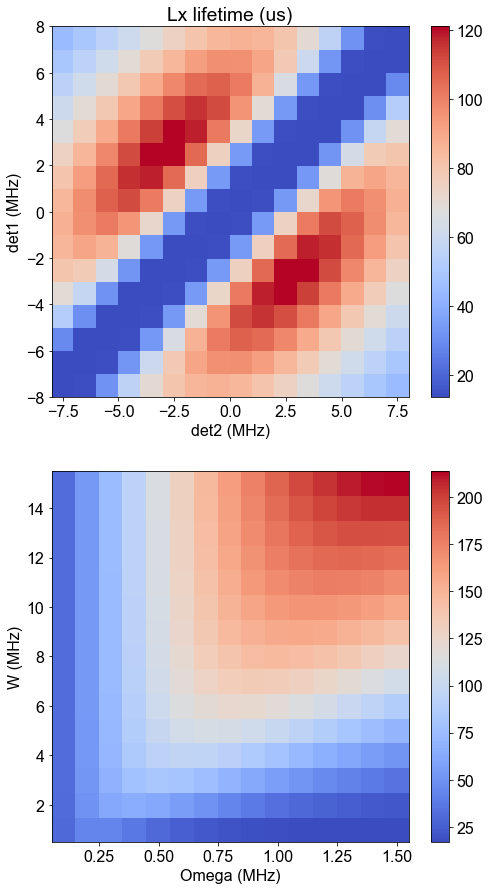

In [5]:
import matplotlib.colors as colors
# aaaa1 = np.array([[48.5086613640438, 53.864483753937435, 61.23928427919868, 71.80904967732077, 86.50164767165136, 104.26936063676251, 117.81780062901288, 115.54030164746955, 94.24567299360125, 56.67092921618957, 78.1516944941149], [54.3106225923295, 60.891224764012634, 71.69125909947901, 88.45813635257846, 114.61778532049188, 147.89159031128744, 161.61881154553487, 123.52830743873542, 60.35960855522303, 82.88482262792587, 55.9295044552497], [62.27537280304035, 72.34099268313216, 89.08933343668417, 120.74250081549839, 176.06601038707177, 229.75720836848168, 164.3925670717516, 63.08736178777876, 87.0421272159609, 59.59757682622636, 93.16310463702007], [73.61267189634586, 90.06145662575071, 121.93872014507095, 188.14388871396193, 296.8698654920754, 208.55535707490165, 64.62619501200369, 90.28580047276226, 62.43115823068678, 121.84860579561327, 116.88750617286138], [89.28801417816594, 117.68088156841439, 179.43800219563542, 298.7174999972139, 228.12663474148775, 65.24617691724158, 92.34230339374467, 64.2231458861089, 162.12246883051313, 163.78889736443355, 121.4765415788067], [108.01564405720431, 152.240449372358, 232.80005482693983, 206.50620944919316, 65.06555453661923, 93.04901712284698, 65.09029257614881, 206.55751525325482, 232.5279663390125, 152.13393654877729, 108.03732118811655], [121.48439512398096, 163.90240555646, 162.12505811042595, 64.17999097681991, 92.35554465937841, 65.26043073165708, 228.3654350571375, 298.385879613431, 179.26858168763655, 117.65439233993877, 89.34035541794927], [116.90061138029517, 121.86216495143363, 62.38501753060596, 90.31341539138351, 64.61796098848941, 208.81833669298314, 296.76232481445305, 187.94761773857783, 121.87430456321542, 90.0707303055257, 73.67163155931613], [93.16456508810357, 59.55551165186696, 87.0857127236884, 63.05576386142274, 164.55974774022903, 229.80428000852652, 175.97754421646312, 120.6726756769924, 89.034433981682, 72.3620811506656, 62.33139711720511], [55.89425612614206, 82.94557453577359, 60.305971674765736, 123.58166648450323, 161.67217222195958, 147.86601119269986, 114.5732603646327, 88.42585605906336, 71.68617205765803, 60.8906693272387, 54.362735501674514], [78.22948611008526, 56.59884019842131, 94.23260744535891, 115.56101827769061, 117.82681644275573, 104.25901152275833, 86.48322182142228, 71.79631294771754, 61.24423822049997, 53.89258516869657, 48.53826282726496]])
levels = [50,100,150,200,250]
# det_list1 = np.linspace(-10,10,11)
# det_list2 = np.linspace(-10,10,11)
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(2,1,1)
# default_x_ticks = range(len(x))
plt.pcolormesh(det_list2, det_list1, logic_T_2d, cmap='coolwarm', norm=colors.Normalize(vmin=logic_T_2d.min(), vmax=logic_T_2d.max()),label='Infidelity',shading='nearest')
# plt.pcolormesh(det_list2, det_list1, logic_T_2d, cmap='coolwarm', norm=colors.Normalize(vmin=20, vmax=200),label='Infidelity',shading='nearest')

# ax.clabel(CS, inline=True)
cbar = plt.colorbar()
ax.set_xlabel('det2 (MHz)')
ax.set_ylabel('det1 (MHz)')
ax.set_title('Lx lifetime (us)')
# plt.xticks(det_list2[:-1])
# ax.set_yticks(det_list1[:])
# ax.set_aspect('equal', adjustable='box')
# plt.grid()

# aaaa = np.array([[369.37381805801346, 506.8648585137982, 372.73499320301397, 243.4712201626527, 163.58060837093763, 115.58439839767175, 85.58020951245042, 65.99988397285105, 52.83530342340032, 43.91483111772134], [381.2668994515299, 646.9976077816649, 611.1730065241408, 460.90402727389414, 330.9920835110816, 240.64621838390482, 179.82087823728364, 138.25414479337724, 109.13115100119991, 88.24895232214784], [385.3874329518779, 716.1380463683577, 788.0416771493815, 672.1467671649971, 518.4580344513605, 390.9860884259878, 297.2457062398489, 230.1291814268375, 181.93362241891546, 146.95326456891726], [386.81768735502374, 752.5567511572706, 909.4000239042541, 853.327554174001, 703.5054420939906, 551.2941901367592, 427.5006078302637, 333.9932241358797, 264.95934875701073, 214.24265215539614], [388.02620829416105, 774.5910762092224, 992.5172861751614, 998.7988331017675, 871.1054284494744, 707.4781223601065, 559.3877817222284, 441.0291624625854, 351.07012585009153, 284.1484641657978], [388.21763019219577, 787.4140718234344, 1049.313577047436, 1112.8516528654, 1017.8136400065599, 854.5516087203928, 688.9483310069613, 548.5432500882972, 438.5416981242305, 355.63770482826374], [388.89814305171535, 797.0826206472834, 1090.7276001859548, 1201.6863562937765, 1140.9291148411075, 984.9252449391836, 807.4615395676926, 648.2659811113831, 519.9642700219161, 422.12530776582616], [389.1056193610676, 803.2414892048532, 1120.192628915336, 1270.3477888012242, 1243.3893604532536, 1099.5888708534653, 915.3504627904784, 740.7590688674188, 596.2085357209148, 484.77786628367994], [389.99656121709654, 809.1633524014462, 1143.6903454018639, 1324.694884376486, 1326.9387487938045, 1195.8077082288648, 1007.3315041064177, 819.8773406855952, 661.1177373447326, 537.6883861142428], [390.06287343411356, 812.3115605021268, 1159.9542538369292, 1366.310524680772, 1395.5123174946154, 1279.0298042496652, 1089.8733708514067, 892.6353071019752, 721.8165016736513, 587.8201965406101]])
ax1 = fig.add_subplot(2,1,2)
plt.pcolormesh(Omega_list, W_list, log_2, cmap='coolwarm', norm=colors.Normalize(vmin=log_2.min(), vmax=log_2.max()),label='Infidelity',shading='nearest')
# CS = ax1.contour(Omega_list, W_list, log_2,levels)
# ax1.clabel(CS, inline=True)
cbar = plt.colorbar()
ax1.set_xlabel('Omega (MHz)')
ax1.set_ylabel('W (MHz)')
# ax1.set_aspect('equal', adjustable='box')
# ax1.set_title('Lx lifetime (us)')
# plt.grid()
plt.savefig("2dSweep1.pdf", bbox_inches = 'tight')

# plot T1p sweep

In [3]:
num = 2*np.pi
W = 10*2*np.pi
omega = 1.0*2*np.pi/sqrt(2)
kappa = 0.5*2*np.pi
r = 1/40
nu = W/sqrt(3)
x = nu/W

s1 = 1
s2 = W**2/(W**2+2*nu**2-2*nu*sqrt(W**2+nu**2))
s3 = 2*(nu+sqrt(W**2+nu**2))/W
s4 = s2
s5 = s1
ks = (s2/sqrt(s1**2+s2**2+s3**2+s4**2+s5**2))**2

gammas = kappa*omega**2*ks/(4*(-nu+sqrt(W**2+nu**2))**2+kappa**2+omega**2*ks)
gammat = kappa*omega**2/(4+4*nu**2/W**2)/(4*nu**2+kappa**2+omega**2/(4+4*nu**2/W**2))
gammar = omega**2*kappa/(kappa**2+omega**2)

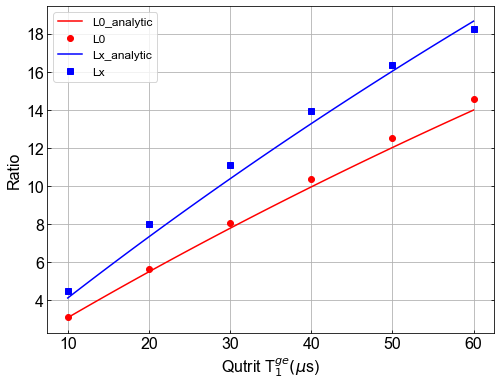

In [5]:
T1p = np.linspace(10,60,6)
L0_T1 = [31.578629817495255,
 113.24455862618456,
 241.7948744266021,
 414.1007776382517,
 626.3462515856588,
 873.3053667239387]
L1_T1 = [31.60153566023071,
 113.43360893993493,
 242.57807845836493,
 417.00705188524375,
 635.5179291864121,
 898.0323455757506]
Lx_T1 = [45.10993189708625,
 159.76675602636837,
 333.89049727767514,
 557.338635991224,
 816.9791513191211,
 1096.0526685186255]

L0_ratio = [L0_T1[i]/T1p[i] for i in range(len(T1p))]
L1_ratio = [L1_T1[i]/T1p[i] for i in range(len(T1p))]
Lx_ratio = [Lx_T1[i]/T1p[i] for i in range(len(T1p))]

analytic_L0 = []
analytic_L1 = []
analytic_Lx = []
analytic_avg = []
T1p1 = np.linspace(10,60,60)
for tt in T1p1:
    r = 1/tt
    Tu = (gammar+gammas+gammat+3*r)/(2*r*(r+gammas+gammat))
    Td = (gammar+gammas+gammat+5*r)/(2*r*(3*r+gammas+gammat))
    analytic_L0.append(1/(1/Tu+1/Td)/tt)
    # analytic_L1.append((gammar+gammas+gammat+7*r)/(4*r*(3*r+gammas+gammat))/tt)
    # analytic_avg.append(analytic_L0[-1]/2+analytic_L1[-1]/2)
    analytic_Lx.append(analytic_L0[-1]*4/3)

fig, axes = plt.subplots(1, 1, figsize=(8,6))
hfont = {'fontname':'Arial'}

axes.plot(T1p1,analytic_L0, '-', color='red', label='L0_analytic')
axes.plot(T1p,L0_ratio, 'o', color='red', label='L0')

axes.set_xlabel('Qutrit T$_1^{ge} (\mu$s)', **hfont)
axes.set_ylabel('Ratio', **hfont)

axes.plot(T1p1,analytic_Lx, '-', color='blue', label='Lx_analytic')
axes.plot(T1p,Lx_ratio, 's', color='blue', label='Lx')

axes.tick_params(direction='in', right=True)
axes.legend(fontsize=12)
plt.grid()
plt.savefig("T1_noT2_new1.pdf", bbox_inches = 'tight')

plt.show()